# Wage data from census "QuickFacts" utility

### Reference:  https://www.census.gov/quickfacts/fact/table/US/PST045218



# Wage Data For Top 5 Counties with Most Migration from SF County

## Data Workflow

1. Use the graphical interface to input up to 6 locations (by city, county, state, etc) https://www.census.gov/quickfacts/fact/table/US/PST045218

** In our case we have taken the then Top 5 counties with most migration from SF county -- both within California, and migration to other states

** The only data cleaning done was to add (for out-of-state),  Travis County TX, (Austin is located there),  which was added manually to the "non_CA_counties.csv" files

2. Import the csv
    Method: pd.read_csv

3. Clean up the data
3.1 Reduce the data size and clean up the naming (for easier reference later on)

3.1.1    df.drop()-    Drop columns all the columns which have no important data
3.1.2    df.dropna() - Drop rows with NaN
3.1.3    df.reset_index() - Reset the index because we had dropped out a few rows
3.1.4    df[:x] - Drop rows, only keep x rows
3.1.5    df.rename()  - Rename the colums with shorter names so the plots look ok
    
3.2      Transform the data.  Because of the %, $ the data inside the dataframe are all read in as objects
3.2.1    df.set_index  - Move the "Fact" column into the index. That way the rest of the data will be cleaned of strings
3.2.2    df.replace    - Replace the %, $, ,  in the data to blank
3.2.3    df.apply(pd.to_numeric()) -- now change the objects in each column into numerics, "apply"  will apply to all cols

3.3      Setup to plot and plot
3.3.1    df[x:y]        -Select the row or rows of data you need
3.3.2    x_axis = np.arange(len(x_data)) -Set the x axis
3.3.3                   -Set the values, extract if needed
3.3.4    plt.bar()      - plot the bar chart

    

In [27]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to load
CA_counties = pd.read_csv("CA_counties.csv")
non_CA_counties = pd.read_csv("non_CA_counties.csv")

CA_counties.drop(columns = ['Fact Note'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Alameda County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Mateo County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Contra Costa County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Los Angeles County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Santa Clara County, California'], inplace=True)

non_CA_counties.drop(columns = ['Fact Note'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for King County, Washington'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for New York County (Manhattan Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Multnomah County, Oregon'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Kings County (Brooklyn Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Cook County, Illinois'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Travis County, Texas'], inplace=True)

# Remove the rows which have NaNs,  doing inplace needed
CA_counties.dropna(inplace=True)
non_CA_counties.dropna(inplace=True)

# Reset the index to keep everything in order, drop = True means that the original index will be discarded
# Do this because we need to have one DF that shows the row number as a reference (later code)
# Reference:  https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

CA_counties.reset_index(drop=True, inplace=True)
non_CA_counties.reset_index(drop=True, inplace=True)


# Only keep the top 62 rows of data

CA_counties = CA_counties[:62]
non_CA_counties = non_CA_counties[:62]


CA_counties

,Fact,"San Francisco County, California","Alameda County, California","San Mateo County, California","Contra Costa County, California","Los Angeles County, California","Santa Clara County, California"
0,"Population estimates, July 1, 2017, (V2017)","884,363","1,663,190","771,410","1,147,439","10,163,507","1,938,153"
1,"Population estimates base, April 1, 2010, (V2...","805,193","1,510,261","718,500","1,049,200","9,818,696","1,781,671"
2,"Population, percent change - April 1, 2010 (es...",9.80%,10.10%,7.40%,9.40%,3.50%,8.80%
3,"Population, Census, April 1, 2010","805,235","1,510,271","718,451","1,049,025","9,818,605","1,781,642"
4,"Persons under 5 years, percent",4.50%,5.90%,5.70%,5.70%,6.10%,6.10%
5,"Persons under 18 years, percent",13.40%,20.70%,20.80%,22.80%,21.90%,22.20%
6,"Persons 65 years and over, percent",15.40%,13.50%,15.80%,15.30%,13.20%,13.10%
7,"Female persons, percent",49.00%,50.80%,50.70%,51.10%,50.70%,49.50%
8,"White alone, percent",53.10%,50.20%,60.60%,65.90%,70.90%,53.80%
9,"Black or African American alone, percent",5.50%,11.30%,2.80%,9.50%,9.00%,2.80%


In [28]:
# Rename the columns, look at the DataFrame
CA_counties = CA_counties.rename(columns={"San Francisco County, California": "San Francisco",
                                 "Alameda County, California":"Alameda",
                                 "San Mateo County, California":"San Mateo",
                                 "Contra Costa County, California":"Contra Costa",
                                "Los Angeles County, California":"Los Angeles",
                                "Santa Clara County, California":"Santa Clara"
                                            })


# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
ca_data = CA_counties.set_index("Fact")

# Clean the $ and % and " signs from multiple columns, first put the columns put them in a list
# Reference:  https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

cols = ca_data.columns

# pass cols to df.replace(), specifying $,%" and , to be replaced by blanks

ca_data[cols] = ca_data[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)

ca_data.head()

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363,1663190,771410,1147439,10163507,1938153
"Population estimates base, April 1, 2010, (V2017)",805193,1510261,718500,1049200,9818696,1781671
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.80,10.10,7.40,9.40,3.50,8.80
"Population, Census, April 1, 2010",805235,1510271,718451,1049025,9818605,1781642
"Persons under 5 years, percent",4.50,5.90,5.70,5.70,6.10,6.10


In [31]:
# convert all objects to numerics
# reference:  https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
#cols = ca_data.columns[ca_data.dtypes.eq('object')]
clean_ca = ca_data[cols].apply(pd.to_numeric, errors='coerce')
clean_ca.head()

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363.0,1663190.0,771410.0,1147439.0,10163507.0,1938153.0
"Population estimates base, April 1, 2010, (V2017)",805193.0,1510261.0,718500.0,1049200.0,9818696.0,1781671.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.8,10.1,7.4,9.4,3.5,8.8
"Population, Census, April 1, 2010",805235.0,1510271.0,718451.0,1049025.0,9818605.0,1781642.0
"Persons under 5 years, percent",4.5,5.9,5.7,5.7,6.1,6.1


In [32]:
# Remove extraneous rows, keep only Median Wages
wages = clean_ca[44:45]

#clean_ca.rename({"Median household income (in 2017 dollars), 2013-2017":"Median Income $"},axis=1)

wages

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Median household income (in 2017 dollars), 2013-2017",96265.0,85743.0,105667.0,88456.0,61015.0,106761.0


In [33]:
# Now setup x and y axes for the bar plot

x_data = wages.columns.tolist()   #  x_data has the list of counties to be plotted
x_axis = np.arange(len(x_data))

print(x_data)            # Check that this is a list of counties
print(wages.values[0])   # this is accessing the first (and only) row of data


median_wage = wages.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]




['San Francisco', 'Alameda', 'San Mateo', 'Contra Costa', 'Los Angeles', 'Santa Clara']
[ 96265.  85743. 105667.  88456.  61015. 106761.]


Text(0.3,120000,'US Census 2013-2017, All data shown in 2017 dollars')

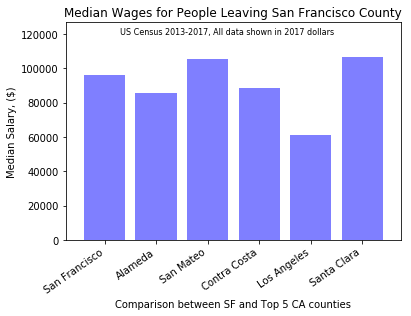

In [51]:
plt.bar(x_axis, median_wage, color='blue', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
#print(tick_locations)

plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_wage) + 20000)
plt.title("Median Wages for People Leaving San Francisco County")
plt.xlabel("Comparison between SF and Top 5 CA counties")
plt.ylabel("Median Salary, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.3,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
#plt.text(1,-70000, "All data shown in 2017 dollars", **style)





In [42]:
non_ca_df = non_CA_counties.rename(columns={"San Francisco County, California":"San Francisco",
                                 "New York County (Manhattan Borough), New York":"NY (Manhattan), NY",
                                 "King County, Washington":"King, WA",
                                "Multnomah County, Oregon":"Multnomah, OR",
                                "Kings County (Brooklyn Borough), New York":"Kings (Brooklyn), NY",
                                "Cook County, Illinois":"Cook, IL",
                                "Travis County, Texas":"Travis, TX"
                                            })

# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
non_ca_data = non_CA_counties.set_index("Fact")

# Clean the $ and % and " signs from multiple columns, first put the columns put them in a list
# Reference:  https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

cols = non_ca_data.columns

# pass cols to df.replace(), specifying $,%" and , to be replaced by blanks

non_ca_data[cols] = non_ca_data[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)

non_ca_data.head()

,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois","Travis County, Texas"
Fact,,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363,1664727,2188649,807555,2648771,5211263,1226698
"Population estimates base, April 1, 2010, (V2017)",805193,1586184,1931281,735169,2504706,5195075,1024479
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.80,5.00,13.30,9.80,5.80,0.30,19.70
"Population, Census, April 1, 2010",805235,1585873,1931249,735334,2504700,5194675,1024266
"Persons under 5 years, percent",4.50,4.80,5.90,5.60,7.30,6.20,6.50


In [43]:
# convert all objects to numerics
# reference:  https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
#cols = ca_data.columns[ca_data.dtypes.eq('object')]
non_ca_data = non_ca_data[cols].apply(pd.to_numeric, errors='coerce')
non_ca_data.head()

,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois","Travis County, Texas"
Fact,,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363.0,1664727.0,2188649.0,807555.0,2648771.0,5211263.0,1226698.0
"Population estimates base, April 1, 2010, (V2017)",805193.0,1586184.0,1931281.0,735169.0,2504706.0,5195075.0,1024479.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.8,5.0,13.3,9.8,5.8,0.3,19.7
"Population, Census, April 1, 2010",805235.0,1585873.0,1931249.0,735334.0,2504700.0,5194675.0,1024266.0
"Persons under 5 years, percent",4.5,4.8,5.9,5.6,7.3,6.2,6.5


In [44]:
# Remove extraneous rows, keep only Median Wages
wages_nonCA = non_ca_data[44:45]

#clean_ca.rename({"Median household income (in 2017 dollars), 2013-2017":"Median Income $"},axis=1)

wages_nonCA

,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois","Travis County, Texas"
Fact,,,,,,,
"Median household income (in 2017 dollars), 2013-2017",96265.0,79781.0,83571.0,60369.0,52782.0,59426.0,68350.0


In [45]:
# Now setup x and y axes for the bar plot

x2_data = wages_nonCA.columns.tolist()   #  x_data has the list of counties to be plotted
x2_axis = np.arange(len(x2_data))

print(x2_data)            # Check that this is a list of counties
print(wages_nonCA.values[0])   # this is accessing the first (and only) row of data


median_wage_nonCA = wages_nonCA.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]




['San Francisco County, California', 'New York County (Manhattan Borough), New York', 'King County, Washington', 'Multnomah County, Oregon', 'Kings County (Brooklyn Borough), New York', 'Cook County, Illinois', 'Travis County, Texas']
[96265. 79781. 83571. 60369. 52782. 59426. 68350.]


Text(0.4,120000,'US Census 2013-2017, All data shown in 2017 dollars')

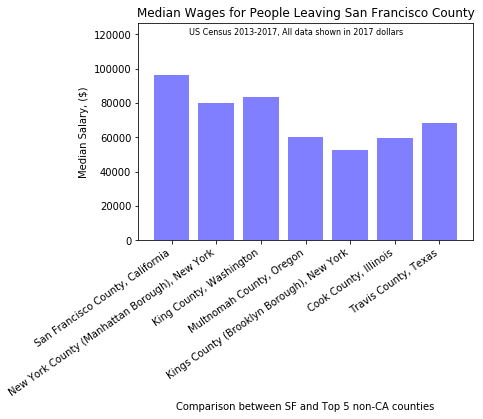

In [54]:
plt.bar(x2_axis, median_wage_nonCA, color='blue', alpha=0.5, align="center")

tick_locations = [value for value in x2_axis]
#print(tick_locations)

plt.xticks(tick_locations, x2_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x2_axis)-0.25)
plt.ylim(0, max(median_wage) + 20000)
plt.title("Median Wages for People Leaving San Francisco County")
plt.xlabel("Comparison between SF and Top 5 non-CA counties")
plt.ylabel("Median Salary, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.4,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
#plt.text(1,-70000, "All data shown in 2017 dollars", **style)



